# Dr.K.Ilayaraja
### Department of Geology
### University of Gondar
### Ethiopia

# 1. Import libraries

In [1]:
import geopandas
import matplotlib as plt
import geopy

%matplotlib inline

# 2. Load the shapefile and plot it

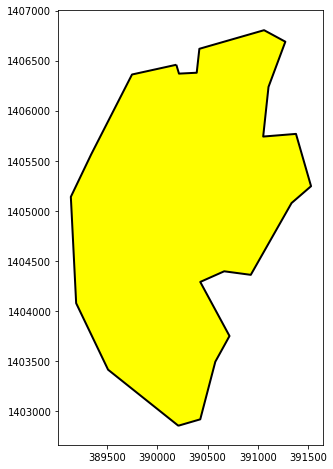

In [37]:
shp_file = 'D:/Lecture/lakenew.dbf'
ilayanew = geopandas.read_file(shp_file)
ax = ilayanew.plot(color='yellow', figsize=(8,8), linewidth=2, edgecolor='black')

In [3]:
ilayanew.geometry.area

0    5.680400e+06
dtype: float64

In [4]:
ilayanew.crs

{'init': 'epsg:32644'}

In [5]:
ilayanew1 = ilayanew.to_crs(epsg=4326)

In [6]:
ilayanew1.crs

{'init': 'epsg:4326', 'no_defs': True}

# 3. List the attributes

In [7]:
ilayanew.columns
ilayanew

,id,lake,geometry
0,1,5680400.03625488,"POLYGON ((390182.9326710691 1406463.525420013,..."


# 4. List the boundaries

In [8]:
ilayanew.total_bounds

array([ 389130.13988624, 1402862.79715593,  391527.67639623,
       1406808.55834949])

# 5. Buffering a lake about 100m

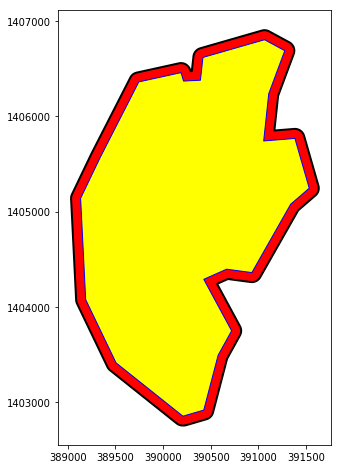

In [35]:
buff_ilaya = ilayanew.buffer(100)

ax = buff_ilaya.plot(color='red', figsize=(8,8), linewidth=2, edgecolor='black')

ilayanew.plot(ax=ax, color='yellow', edgecolor='blue')

In [10]:
buff_ilaya.geometry.area

0    6.815818e+06
dtype: float64

# 6. Load another point layer

,id,Lat,Long,geometry
0,1,389798.307097,1.406159e+06,POINT (389798.3070965216 1406158.546110765)
1,2,389725.622022,1.405424e+06,POINT (389725.6220219033 1405424.42685712)
2,3,390779.555604,1.405388e+06,POINT (390779.5556038689 1405388.084319811)
3,4,389558.446350,1.404690e+06,POINT (389558.4463502812 1404690.307603475)
4,6,389841.918141,1.404036e+06,POINT (389841.9181412926 1404036.141931911)


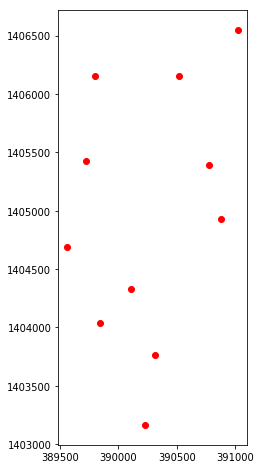

In [29]:
shp_file = 'D:/Lecture/pointsnew.dbf'
pointsnew = geopandas.read_file(shp_file)
axis = pointsnew.plot(color='red', figsize=(8,8))
pointsnew.head()

# Buffering a point over 50m

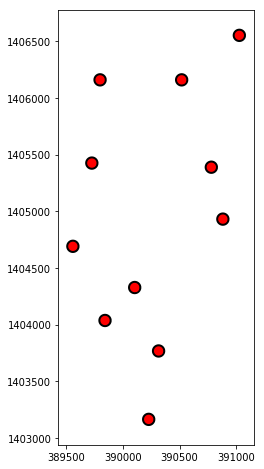

In [31]:
buff_new = pointsnew.buffer(50)
ax = buff_new.plot(color='red', figsize=(8,8), linewidth=2, edgecolor='black')
pointsnew.plot(ax=ax, color='red')

# 7. To obtain its geometry

In [12]:
pointsnew.geometry

0     POINT (389798.3070965216 1406158.546110765)
1      POINT (389725.6220219033 1405424.42685712)
2     POINT (390779.5556038689 1405388.084319811)
3     POINT (389558.4463502812 1404690.307603475)
4     POINT (389841.9181412926 1404036.141931911)
5     POINT (390103.5844099185 1404326.882230384)
6     POINT (390881.3147083345 1404930.168349716)
7     POINT (390314.3711263117 1403767.207155823)
8     POINT (390227.1490367696 1403163.921036491)
9     POINT (390517.8893352429 1406158.546110765)
10    POINT (391026.6848575711 1406551.045513704)
Name: geometry, dtype: object

In [13]:
type(pointsnew.geometry)

geopandas.geoseries.GeoSeries

In [14]:
type(pointsnew.geometry[0])

shapely.geometry.point.Point

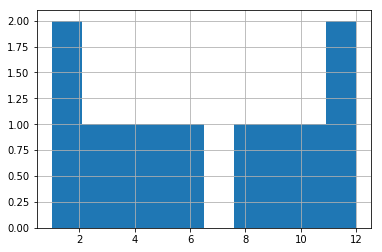

In [15]:
pointsnew['id'].hist()

# 8. Overlaying the two features

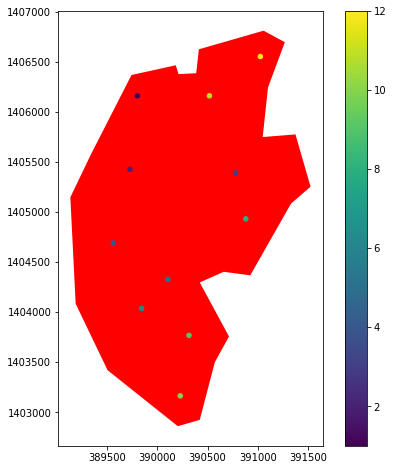

In [34]:
ax = ilayanew.plot(color='red', figsize=(8,8))
pointsnew.plot(ax=ax, column='id', markersize=20, legend=True)

# 8.1 Overlay of two buffer layers

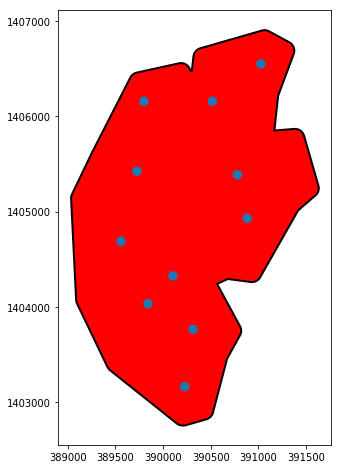

In [33]:
ax = buff_ilaya.plot(color='red', figsize=(8,8), linewidth=2, edgecolor='black')
buff_new.plot(ax=ax)

# 9. Conversion to new Coordinate system

In [18]:
pointsnew.crs

{'init': 'epsg:32644'}

In [19]:
pointsnew.geometry.head()

0    POINT (389798.3070965216 1406158.546110765)
1     POINT (389725.6220219033 1405424.42685712)
2    POINT (390779.5556038689 1405388.084319811)
3    POINT (389558.4463502812 1404690.307603475)
4    POINT (389841.9181412926 1404036.141931911)
Name: geometry, dtype: object

In [20]:
pointsnew1 = pointsnew.to_crs(epsg=4326)

In [21]:
pointsnew1.geometry.head()
#here the point data is shown in long/lat

0    POINT (79.98494939531788 12.71793566306937)
1    POINT (79.98430636079298 12.71129557162551)
2    POINT (79.99401396199886 12.71100397645035)
3     POINT (79.9827931498009 12.70465214322967)
4    POINT (79.98542719837016 12.69874750264552)
Name: geometry, dtype: object

# Interactive Map

In [38]:
import folium

In [41]:
m = folium.Map(location=[12.71129557162551, 79.98430636079298], zoom_start=10)
folium.GeoJson(ilayanew1.to_json()).add_to(m) 
folium.GeoJson(pointsnew1.to_json()).add_to(m)
m
#m.save('D:/Lecture/folium_map1.html')